# A-Stability

In [44]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as mtick
import scipy.integrate as scint
%matplotlib inline

$$\renewcommand{\R}{\mathbb{R}}$$
$$\renewcommand{\C}{\mathbb{C}}$$
$$\renewcommand{\Re}{\operatorname{Re}}$$

## example: chemical reactions (Robertson 1966)

* catalytic reactions:

\begin{align*}
    A &\rightarrow B \\
   2B &\rightarrow B+C \\
 B+C  &\rightarrow A+C
\end{align*}

* A converts to B which converts to C which drives conversion of B to A
* kinetic rate equations: 

  \begin{align*}
    \frac{du_1}{dt} &= -0.04 u_1                     + 10^4 u_2 u_3 \\
    \frac{du_2}{dt} &=  0.04 u_1  -3\cdot 10^7 u_2^2 - 10^4 u_2 u_3 \\
    \frac{du_3}{dt} &=             3\cdot 10^7 u_2^2
  \end{align*}

  $u_1,u_2$ and $u_3$ are concentrations of $A, B$ and $C$, respectively
  
* initial conditions $u_1(0)=1$ and $u_2(0)=u_3(0)=0$
  
## numerical solution -- short time $T$ and small step $h$


In [45]:
def f(t,u): # Robertson reaction
    du = u.copy()
    du[0] = -0.04*u[0]                  + 10**4*u[1]*u[2]
    du[1] =  0.04*u[0] -3*10**7*u[1]**2 - 10**4*u[1]*u[2]
    du[2] =             3*10**7*u[1]**2
    return(du)
phi = f  # Euler
n  = 1024; T=0.016; h = T/n
tk = np.linspace(0,T,n+1)
uk = np.zeros((n+1,3))
uk[0,0] = 1.0
for j in range(n):
    uk[j+1,:] = uk[j,:] + h*phi(j*h,uk[j,:])

-------------------------------------



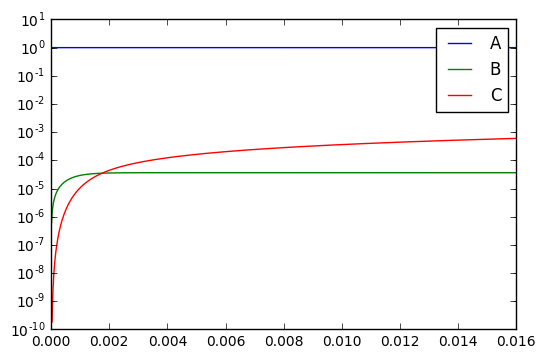

In [46]:
plt.semilogy(tk,uk[:,0],label='A')
plt.semilogy(tk,uk[:,1],label='B')
plt.semilogy(tk,uk[:,2],label='C')
plt.axis(ymax=10)
plt.legend(); 

## larger time $T$ and step size $h$

* larger step size to reduce computational time

In [47]:
n  = 128; T=0.16; h = T/n
tk = np.linspace(0,T,n+1)
uk = np.zeros((n+1,3))
uk[0,0] = 1.0
for j in range(n):
    uk[j+1,:] = uk[j,:] + h*phi(j*h,uk[j,:])

------------------------------------

* larger step sizes introduce (numerical) fluctuations

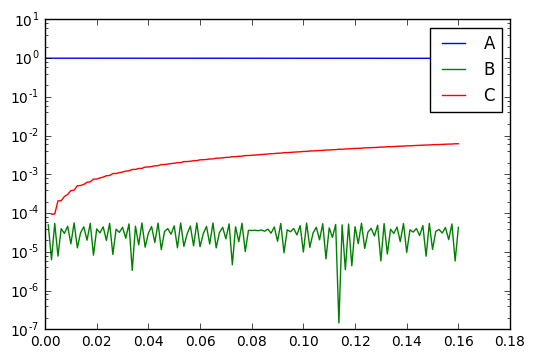

In [48]:
plt.semilogy(tk,uk[:,0],label='A')
plt.semilogy(tk,abs(uk[:,1]),label='B')
plt.semilogy(tk,uk[:,2],label='C')
plt.axis(ymax=10)
plt.legend();

## Stability of solutions of ODEs

* ODE $$\frac{du}{dt} = f(t,u)$$

**Definition (stable solution)**

*A solution $u(t)$ of the ODE is stable if for some $\epsilon>0$ and all solutions $v(t)$ of the ODE with
 $\lVert v(0) - u(0) \rVert \leq \epsilon$ the difference $v(t)-u(t)$ is bounded.*
 
**Example**
For $t\in \R_+$ and the differential equation 
$$\frac{du}{dt} = -u$$
any solution $u(t)$ is stable.

---------------------------

**Definition (unstable solution)**

*A solution $u(t)$ of the ODE is unstable if for all $\epsilon>0$ there exists a solution $v(t)$ of the 
 ODE with $\lVert v(0) - u(0) \rVert \leq \epsilon$ such that the difference $v(t)-u(t)$ is unbounded.*
 
**Example**
For $t\in\R_+$ and the differential equation
$$\frac{du}{dt} = u$$
any solution $u(t)$ is unstable.

**Definition (asymptotically stable solution)**
*A solution $u(t)$ of the ODE is asymptotically stable if for some $\epsilon>0$ and all solutions $v(t)$ of the ODE with  $\lVert v(0) - u(0) \rVert \leq \epsilon$ one has * $\lim_{t\rightarrow \infty} \lVert u(t) - v(t)\rVert = 0$.
 

## perturbation analysis of stable solutions of ODEs

* consider a family of solutions $u_\epsilon(t) = u(t) + \epsilon v(t)$ which all satisfy
  the same ODE $$\frac{du_\epsilon}{dt} = f(t,u_\epsilon)$$ where $u$ is an asymptotically stable solution
  
* as $v(t)$ is bounded one has, for twice continuously differentiable $f$ the Taylor expansion
  $$f(t,u_\epsilon) = f(t,u) + \epsilon f_u(t,u) v + O(\epsilon^2)$$
  
* it follows that $v$ satisfies approximately the linear ODE $$\frac{dv}{dt} = f_u(t,u) v$$
  and consequently, the solutions of this ODE with sufficiently small initial values have to
  be bounded if the solution $u(t)$ is stable

------------------------------------

* if for $t\rightarrow \infty$ one has $f_u(t,u) \rightarrow \lambda$ then all solutions of
  $$\frac{dv}{dt} = \lambda v$$ have to be asymptotically stable and thus $\lambda < 0$

* when considering multiple variables $f_u(t,u)$ is the Jacobi matrix then think of $\lambda$ as
  a (complex) eigenvalue and $u(t)\in \C$
  
* this motivates the study of the numerical solution of $$du/dt = \lambda u$$ and $u(t) \in \C$

## amplification factor

* consider family of complex ODEs with $f(t,u) = \lambda u$ $$\frac{du}{dt} = \lambda u$$
  
* all one-step methods considered construct $\phi(t,u)$ through compositions of linear combinations of 
  evaluations of $f$
  
* it follows that for for the family of ODEs considered one has $$u_{k+1} = \rho(\lambda h) u_k$$
  where $\rho(z)$ is a polynomial with real coefficients and $\rho(0) = 1$ for the (explicit) one-step
  methods
  
* in the following we will also consider *implicit methods* for which $\rho(z)$ is a rational function
  
* $\rho(\lambda h)$ is the *amplification factor* and
  $$u_k = \rho(\lambda h)^k u_0$$
  
## A-stability

* the ODEs considered are asymptotically stable if $\Re(\lambda) < 0$ and in this case
  the exact solution $u(t)$ satisfies $$u(t) \rightarrow 0, \quad t\rightarrow \infty$$
  
* we say that a one-step method is *A-stable* if $$u_k \rightarrow 0, \quad k\rightarrow \infty$$
  and this is the case $$|\rho(\lambda h)| < 1$$
  
* the *region of A-stability* of a one-step method is
  $$\Omega = \left\{z \in \C \mid |\rho(z)| < 1\right\}$$

## A-stability of Euler's method

* Euler's method for the ODEs considered gives
  $$u_{k+1} = (1 + \lambda h) u_k$$
  
* amplification factor for Euler
  $$\rho(z) = 1 + z$$
  
* region of A-stability $$\Omega = \{z \mid |1+z| < 1 \}$$ is a circle in the complex plane with radius 1 
  and centre $-1$
  
## plotting the region of A-stability of Euler's method

In [49]:
xg = np.linspace(-2,2,100)
yg = np.linspace(-2,2,100)
X, Y = np.meshgrid(xg,yg)
Rho = np.sqrt((1+X)**2 + Y**2)

-----------------------------------

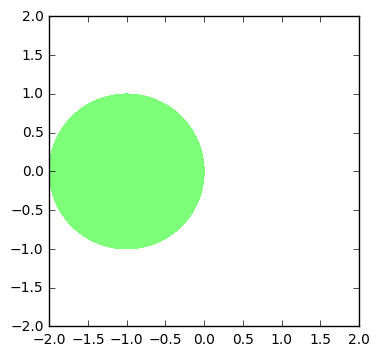

In [50]:
plt.contourf(X,Y,Rho,[0.0,1.0,]); plt.axis('square');

  
## A-stability and choice of $h$ for $du/dt = \lambda u$ with $\lambda < 0$

* convergence for small $h$ and unstability for large $h$

In [51]:
f = lambda t, u, lam=-20.2 : lam*u
phi = f # Euler
n = 200; h=0.1; T = n*h; 
tk = np.linspace(0,T,n+1)
uk = np.ones(n+1)
for k in range(0,n):
    uk[k+1] = uk[k] + h*phi(k,uk[k])  

---------------------------------------
* $\lambda h=-2.02$ (just) outside region of A-stability

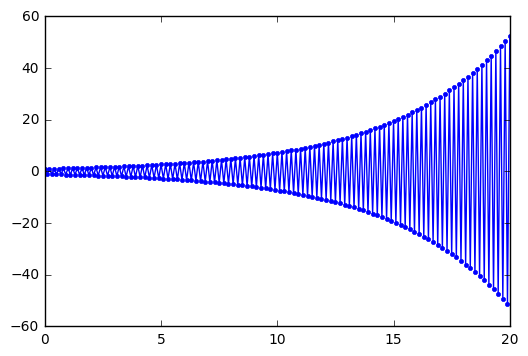

In [52]:
plt.plot(tk,uk,'.-');

## backward Euler method

* also implicit Euler method as rhs depends on $u_{k+1}$ $$u_{k+1} = u_k + h f(t_{k+1},u_{k+1})$$

* numerical solution, typically iterative method
  \begin{align*}
    u_{k+1}^0 &= u_k \\
    u_{k+1}^{j+1} &= \alpha u_{k+1}^{j} + (1-\alpha)(u_k + hf(t_{k+1},u_{k+1}^j)), \quad j=0,\ldots, m
  \end{align*}
  
* for the iteration we choose a relaxed fixed point iteration (sometimes called corrector) with
  $\alpha \in [0,1]$
  
## amplification factor for backward Euler

* one-step for model problem
  $$u_{k+1} = u_k + \lambda h u_{k+1}$$
  
* solve
  $$u_{k+1} = \frac{1}{1-\lambda h} u_k$$
  
* amplification factor
  $$\rho(z) = \frac{1}{1-z}$$
  
* the iterative solver gives a slightly different amplification factor which should be
  investigated ...
  
## plotting the region of A-stability for backward Euler

* backward Euler is unconditionally (for all $h$) A-stable for all $\lambda$ with $\Re(\lambda) < 0$

In [53]:
xg = np.linspace(-2,2,100)
yg = np.linspace(-2,2,100)
X, Y = np.meshgrid(xg,yg)
Rho = 1.0/np.sqrt((1-X)**2 + Y**2)

--------------------------------

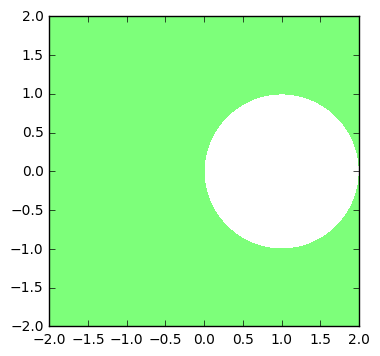

In [54]:
plt.contourf(X,Y,Rho,[0.0,1.0,]); plt.axis('square');

  
  
## previous example with backward Euler

* convergence for small $h$ and unstability for large $h$

In [55]:
lam=-20.2
f = lambda t, u, lam = lam : lam*u
phi = f # Euler forward
n = 200; h=0.1; T = n*h; m=4; alpha=0.5
tk = np.linspace(0,T,n+1)
uk = np.ones(n+1)
for k in range(0,n):
    ukp1 = uk[k]
    for j in range(m): # corrector: relaxed fixpoint
        ukp1 = alpha*ukp1 + (1-alpha)*(uk[k] + h*phi(k,ukp1))  
    uk[k+1] = ukp1
    

-------------------------------------------

* solution decreasing (with error)

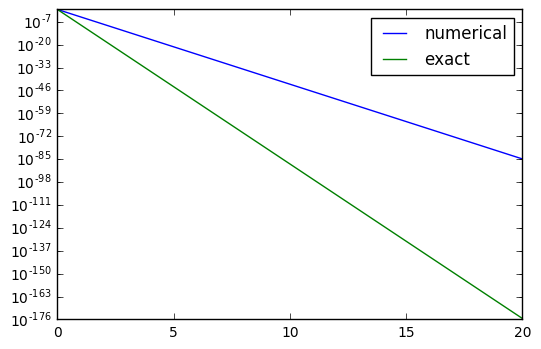

In [56]:
plt.semilogy(tk,uk, label='numerical')
plt.semilogy(tk,np.exp(lam*tk), label='exact')
plt.legend();

## backward Euler for Robertson example


In [57]:
def f(t,u): # Robertson reaction
    du = u.copy()
    du[0] = -0.04*u[0]                  + 10**4*u[1]*u[2]
    du[1] =  0.04*u[0] -3*10**7*u[1]**2 - 10**4*u[1]*u[2]
    du[2] =             3*10**7*u[1]**2
    return(du)
phi = f  # Euler
s=128; n  = s*32; T=s*0.16; h = T/n
m = 10; alpha = 0.1
tk = np.linspace(0,T,n+1)
uk = np.zeros((n+1,3))
uk[0,0] = 1.0
for j in range(n):
    ukp1 = uk[j,:]
    for i in range(m):
        ukp1 = (1-alpha)*ukp1 + alpha*(uk[j,:] + h*phi(j*h,ukp1))
    uk[j+1,:] = uk[j,:] + h*phi(j*h,ukp1)

---------------------------------------

* fluctuations in B disappear even for large T

In [58]:
def plotting():
    plt.semilogy(tk,uk[:,0],label='A')
    plt.semilogy(tk,abs(uk[:,1]),label='B')
    plt.semilogy(tk,uk[:,2],label='C')
    plt.axis(ymax=10)
    plt.legend();

----------------------------------------

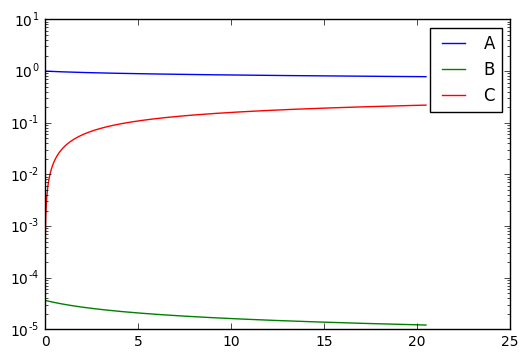

In [59]:
plotting()

## amplification factor  for Runge-Kutta

* recall: 2 stages of Runge-Kutta
    * stage 1: $$U_k^j = u_k + h \sum_{i=1}^m b_{ji}\,f(s_i,U_k^i), \quad j=1,\ldots,m$$
    * stage 2: $$u_{k+1} = u_k + h\sum_{j=1}^m c_j\, U_k^j$$

* stage 1: define $\rho_j(z)$ for every $U_k^j$: 
  $$\rho_j(z) = 1 + z \sum_{i=1}^{m} b_{ji}\, \rho_i(z)$$
    
    * one needs to solve this system of equations for $\rho_j$
    
* stage 2:
  $$\rho(z) = 1 + z\sum_{j=1}^m c_j\, \rho_j(z)$$
  
## example 2: Heun's method

$$B = \begin{bmatrix} 0 & 0 \\ 1 & 0 \end{bmatrix}, \quad c^T = \begin{bmatrix} 0.5 & 0.5 \end{bmatrix}$$

* first stage
    * $\rho_1(z) = 1$ and $\rho_2(\lambda h) = 1 + z$
* second stage
  $$\rho(z) = 1 + 0.5z + 0.5z(1+z) = 1 + z + z^2/2$$
  
## example 3: midpoint method

$$B = \begin{bmatrix} 0 & 0 \\ 0.5 & 0 \end{bmatrix}, \quad c^T = \begin{bmatrix} 0 & 1 \end{bmatrix}$$

* first stage
    * $\rho_1(z) = 1$ and $\rho_2(z) = 1 + z/2$
* second stage
  $$\rho(z) = 1 + z (1+z/2) = 1 + z + z^2/2$$
  
## region of A-stability for Heun and midpoint method

In [60]:
xg = np.linspace(-4,2,100)
yg = np.linspace(-3,3,100)
X, Y = np.meshgrid(xg,yg)
Rho = np.sqrt((1+X+(X*X-Y*Y)/2)**2 + (Y+X*Y)**2)

-------------------------------

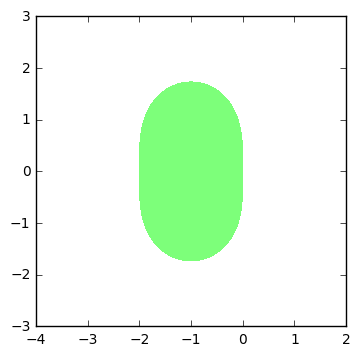

In [61]:
plt.contourf(X,Y,Rho,[0.0,1.0,]); plt.axis('square');

  
## example 4: fourth order Runge Kutta method

$$B = \begin{bmatrix} 0 & 0 & 0 & 0\\ 0.5 & 0 & 0 & 0 \\ 0 & 0.5 & 0 & 0 \\ 0 & 0 & 1 & 0\end{bmatrix}, \
  \quad c^T = \frac{1}{6}\begin{bmatrix} 1 & 2 & 2 & 1\end{bmatrix}$$

* first stage 
\begin{align*}
  \rho_1(z) &= 1\\
  \rho_2(z) &= 1+z/2\\
  \rho_3(z) &= 1+z/2+z^2/4\\
  \rho_4(z) &= 1+z+z^2/2+z^3/4
\end{align*}

* second stage
     $$\rho(z) = 1 + z + z^2/2 + z^3/6 + z^4/24$$
     
## plot A-stability region for Runge-Kutta

In [62]:
xg = np.linspace(-4,2,100)
yg = np.linspace(-3,3,100)
X, Y = np.meshgrid(xg,yg)
Z = X + Y*1j
Rho = abs(1+Z+Z**2/2+Z**3/6+Z**4/24)

----------------------------------

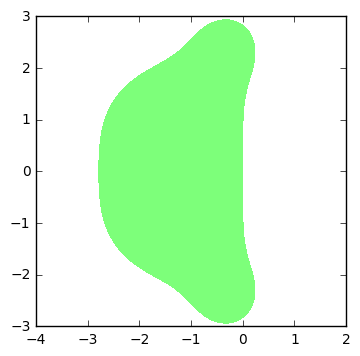

In [63]:
plt.contourf(X,Y,Rho,[0.0,1.0,]); plt.axis('square');

## example 5: trapezoidal rule

* implicit method:
  $$u_{k+1} = u_k + 0.5\lambda\, h(u_k + u_{k+1})$$
  
* solve
  $$u_{k+1} = \frac{1+\lambda h/2}{1-\lambda h/2} u_k$$
  
* amplification factor
  $$\rho(z) = \frac{1+z/2}{1-z/2}$$
  
* $|\rho(z)| < 1$ for all $z$ with $\Re(z)<0$ and larger than 1 else

## plot A-stability region for (implicit) trapezoidal rule


In [64]:
xg = np.linspace(-4,2,100)
yg = np.linspace(-3,3,100)
X, Y = np.meshgrid(xg,yg)
Z = X + Y*1j
Rho = abs((1+Z/2)/(1-Z/2))

----------------------------------

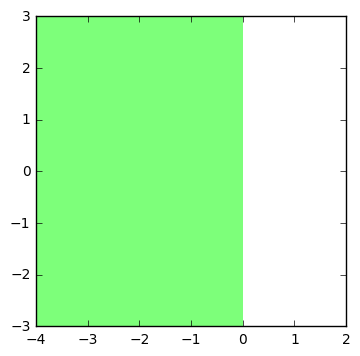

In [65]:
plt.contourf(X,Y,Rho,[0.0,1.0,]); plt.axis('square');